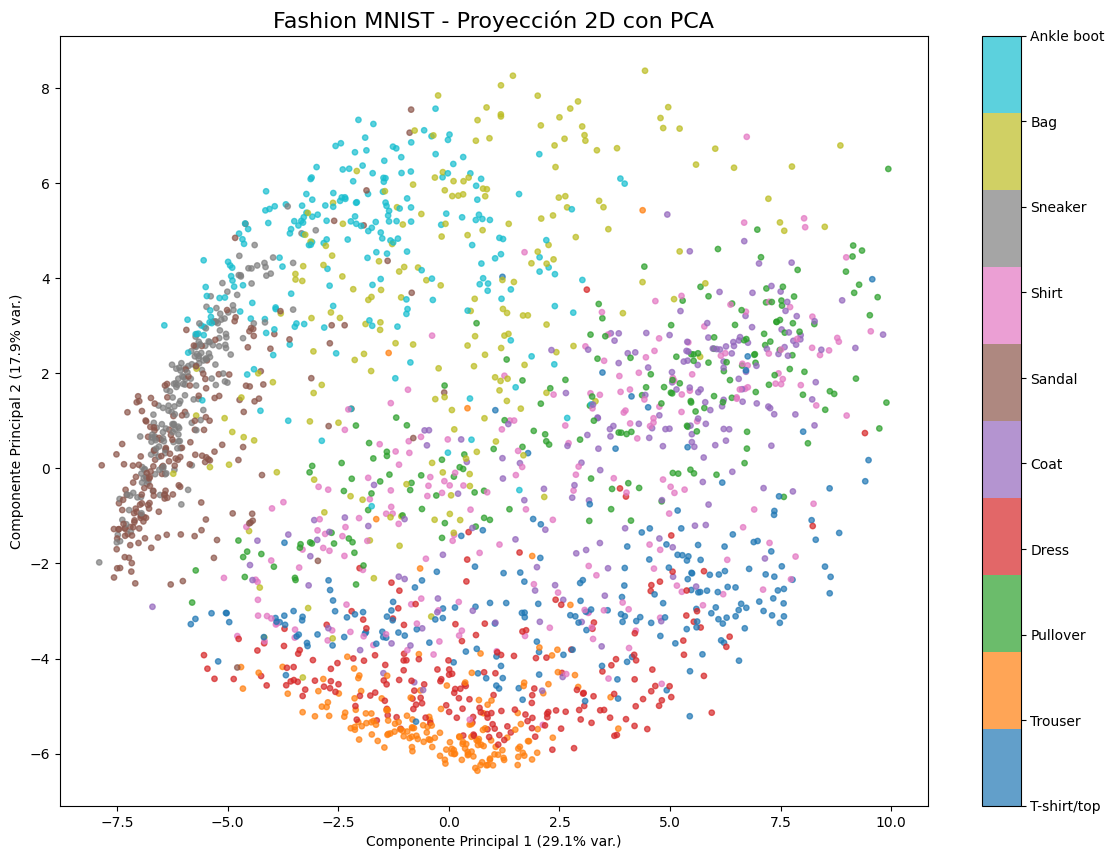

In [13]:
# Paso 1: Instalar dependencias (si es necesario)
!pip install tensorflow --quiet  # Para usar keras

# Paso 2: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Paso 3: Cargar datos:

# --- Usando TensorFlow/Keras ---
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reformatear imágenes (28x28 -> 784 pixels)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


# Paso 4: Preprocesamiento
# Combinar train y test para visualización (opcional)
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train.astype(int), y_test.astype(int)])

# Normalizar (escalar entre 0-1)
X = X / 255.0

# Paso 5: Muestreo aleatorio (para visualización)
np.random.seed(42)
sample_idx = np.random.choice(X.shape[0], 2000, replace=False)
X_sample = X[sample_idx]
y_sample = y[sample_idx]

# Paso 6: Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Paso 7: Visualización interactiva en Colab
plt.figure(figsize=(14, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=y_sample,
                     cmap='tab10',
                     alpha=0.7,
                     s=15)

# Configurar leyenda
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cbar = plt.colorbar(scatter, ticks=range(10))
cbar.ax.set_yticklabels(class_names)
plt.title('Fashion MNIST - Proyección 2D con PCA', fontsize=16)
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% var.)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% var.)')

plt.show()